# ML with sklearn
**Author:** Andrew Sen

## Data Exploration

### Reading and Manipulating Data

In [65]:
import pandas as pd

df = pd.read_csv('auto.csv')
df.head() # print first few rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


In [66]:
print('Data frame dimensions: ' + str(df.shape))

Data frame dimensions: (392, 9)


In [67]:
# print summaries of mpg, weight, year columns
print(df.mpg.describe())
print()
print(df.weight.describe())
print()
print(df.year.describe())

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64


mpg:  
range = 37.6, mean = 23.445918

weight:  
range = 3527, mean = 2977.584184

year:  
range = 12, mean = 76.010256

In [68]:
df.dtypes # print types of columns

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

In [69]:
df.cylinders = df.cylinders.astype('category').cat.codes
df.origin = df.origin.astype('category')
df.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

In [70]:
df.dropna(inplace=True) # drop rows with NA values
print('Dimensions after dropping NAs: ' + str(df.shape))

Dimensions after dropping NAs: (389, 9)


In [71]:
# make binary classifier 'mpg_high' column
avg_mpg = df.mpg.mean()
df['mpg_high'] = df.mpg.map(lambda x: 1 if x > avg_mpg else 0).astype('category')

# remove 'mpg' and 'name' columns
df.drop(columns=['mpg', 'name'], inplace=True)

df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


### Graphs

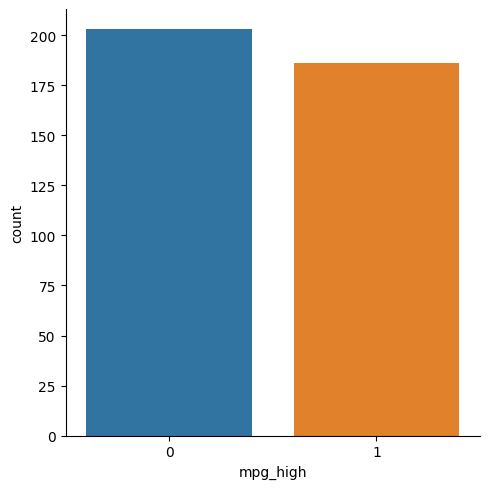

In [72]:
import seaborn as sb

sb.catplot(x='mpg_high', kind='count', data=df)

This graph shows that most cars in the dataset have below average mpg.

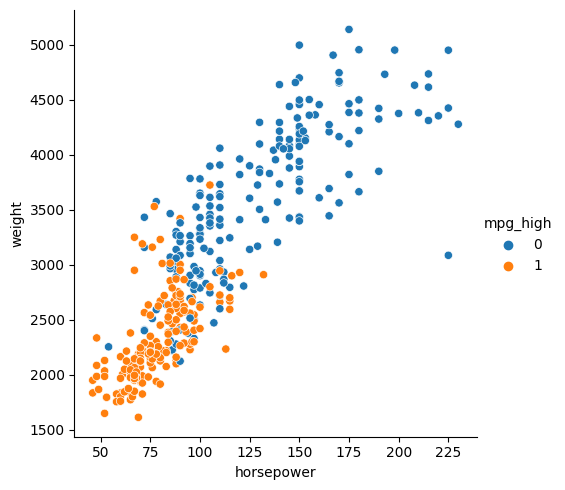

In [73]:
sb.relplot(x='horsepower', y='weight', hue='mpg_high', data=df)

This graph shows that vehicles with high horsepower and weight tend to have below average mpg.

<AxesSubplot: xlabel='mpg_high', ylabel='weight'>

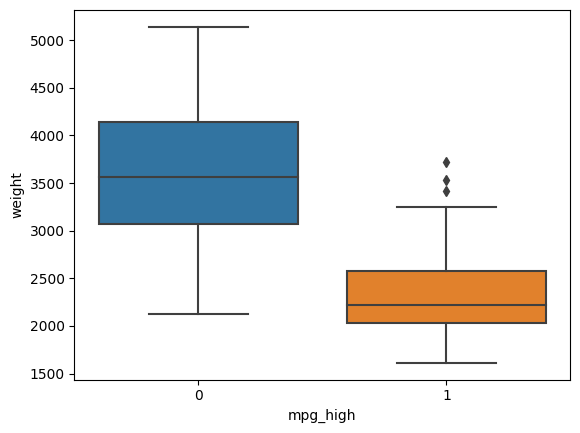

In [74]:
sb.boxplot(x='mpg_high', y='weight', data=df)

This graph shows that cars with above average mpg tend to have lower weight than cars with below average mpg.

## Classification

We will now perform classification using various methods available in sklearn. First, we will divide the data into train/test data.

In [75]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'mpg_high']
y = df.mpg_high
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('Dimensions:')
print(f'X_train: {str(X_train.shape)}')
print(f'y_train: {str(y_train.shape)}')
print(f'X_test: {str(X_test.shape)}')
print(f'y_test: {str(y_test.shape)}')

Dimensions:
X_train: (311, 7)
y_train: (311,)
X_test: (78, 7)
y_test: (78,)


### Logistic Regression

In [76]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1234)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78



Accuracy is 90%. Precision is higher for class 0, but the recall is higher for class 1. We would like both precision and recall to be more even between both classes.

### Decision Trees

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



[Text(0.6433823529411765, 0.9444444444444444, 'X[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4338235294117647, 0.8333333333333334, 'X[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.27941176470588236, 0.7222222222222222, 'X[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.14705882352941177, 0.6111111111111112, 'X[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.058823529411764705, 0.5, 'X[4] <= 13.75\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'X[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.058823529411764705, 0.2777777777777778, 'X[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.029411764705882353, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08823529411764706, 0.16666666666666666, 'X

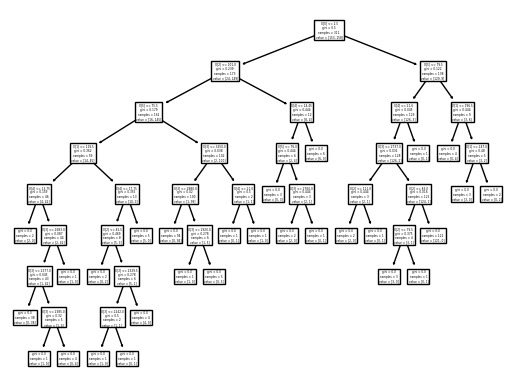

In [77]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1234)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))

# plotting tree
from sklearn import tree
tree.plot_tree(dt)

This is slightly more accurate than the logistic regression model at 91%. The values for precision and recall are also more even between both classes compared to logistic regression.

### Neural Network

Before making a neural network, we'll first scale the data to improve the performance of our models.

In [78]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we'll make our first neural network. The choice of network topology is mostly arbitrary at this stage.

In [79]:
from sklearn.neural_network import MLPClassifier

nn1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(6, 3), max_iter=1500, random_state=1234)
nn1.fit(X_train_scaled, y_train)
pred_nn1 = nn1.predict(X_test_scaled)
print(classification_report(y_test, pred_nn1))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        50
           1       0.81      0.93      0.87        28

    accuracy                           0.90        78
   macro avg       0.88      0.90      0.89        78
weighted avg       0.90      0.90      0.90        78



With these settings, we've already gotten 90% accuracy, performing about as well as the other two models, and precision and recall are fairly balanced.

Now we will make a second neural network. For this model, I will change the solver and increase the number of layers to see if it will get better results.

In [80]:
nn2 = MLPClassifier(solver='sgd', hidden_layer_sizes=(7, 5, 2), max_iter=1500, random_state=1234)
nn2.fit(X_train_scaled, y_train)
pred_nn2 = nn2.predict(X_test_scaled)
print(classification_report(y_test, pred_nn2))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.75      0.96      0.84        28

    accuracy                           0.87        78
   macro avg       0.86      0.89      0.87        78
weighted avg       0.89      0.87      0.87        78



As we can see, this model unfortunately performed worse than the first neural network. This may be because the addition of a third hidden layer caused the model to overfit the training data. Since the dataset is relatively small, overfitting is very likely with a neural network.

### Analysis

The decision tree performed the best, followed by the first neural network, the second neural network, and finally the logistic regression model.

With regards to class 0, the logistic regression model had the highest precision, followed by the second neural network, decision tree and first neural network. The decision tree had the highest recall, followed by the first neural network, the logistic regression model, and finally the second neural network.

With regards to class 1, the decision tree had the highest precision, followed by the first neural network, logistic regression model, and finally the second neural network. The logistic regression model had the highest recall, followed by the second neural network, decision tree and first neural network. The decision tree overall had the most balanced values for both precision and recall.

Both neural networks may have slightly overfit the data given that the training set is relatively small. The logistic regression algorithm also did not adapt to the imbalance of the classes in the training set as well as the decision trees model. However, logistic regression, decision trees, and the first neural network got very similar accuracies, with decision trees just barely performing better. It is possible that a different seed for the train/test split may change which algorithm performs the best.

Overall, I much prefer the experience of using pandas and sklearn in Python compared to writing R. Pandas feels easier to learn compared to R's syntax for data manipulation. Since I am writing this in an IDE, I get tooltips for text-completion and documentation. While RStudio has text completion, learning how to use its various functionalities usually necessitates going to the help console or simply looking things up online.